In [16]:
import numpy as np
import pandas as pd
import os

In [17]:
df_ent = pd.read_csv('input/output.csv')
df_hack = pd.read_csv('input/HackerNoon.csv')

In [18]:
df_ent = df_ent.dropna()
df_hack = df_hack.dropna()

In [19]:
print(len(df_ent) ,len(df_hack))

308 581


In [29]:
df_combined = pd.concat([df_ent, df_hack.iloc[:308]]).reset_index()
df_combined['Site'].unique()

array(['https://entrepreneurshandbook.co/', 'https://hackernoon.com/'],
      dtype=object)

In [30]:
df_combined['target'] = df_combined['Site'].apply(lambda x : 1 if x == 'https://entrepreneurshandbook.co/' else 0)

In [31]:
df_combined['target'].value_counts()

1    308
0    308
Name: target, dtype: int64

In [32]:
df_combined.head()

,index,Author,Site,Text,target
0,0,"Deb Knobelman, PhD",https://entrepreneurshandbook.co/,I hear this sentiment so often from creative e...,1
1,1,"Deb Knobelman, PhD",https://entrepreneurshandbook.co/,Entrepreneurs by nature tend to be people who...,1
2,3,"Deb Knobelman, PhD",https://entrepreneurshandbook.co/,"On the flip side, they often shy away from, lo...",1
3,5,"Deb Knobelman, PhD",https://entrepreneurshandbook.co/,"You can set big, hairy, audacious goals for yo...",1
4,6,"Deb Knobelman, PhD",https://entrepreneurshandbook.co/,Goals are critical,1


In [33]:
# Importing Essential Datasets
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from string import punctuation
import re
from functools import reduce

In [34]:
def remove_stopwords(words):
    stop_words = set(stopwords.words("english"))
    return [word for word in words if word not in stop_words]

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def lemmatize_text(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def stem_text(words):
    ps = PorterStemmer()
    return [ps.stem(word) for word in words]

In [35]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
df_combined['Text'] = df_combined['Text'].apply(lambda x : x.lower())
df_combined['Text'] = df_combined['Text'].apply(remove_punctuation)
df_combined['Text'] = df_combined['Text'].apply(word_tokenize)
df_combined['Text'] = df_combined['Text'].apply(remove_stopwords)
df_combined['Text'] = df_combined['Text'].apply(lemmatize_text)

In [37]:
print (df_combined.head())
print (df_combined.tail())

   index              Author                               Site  \
0      0  Deb Knobelman, PhD  https://entrepreneurshandbook.co/   
1      1  Deb Knobelman, PhD  https://entrepreneurshandbook.co/   
2      3  Deb Knobelman, PhD  https://entrepreneurshandbook.co/   
3      5  Deb Knobelman, PhD  https://entrepreneurshandbook.co/   
4      6  Deb Knobelman, PhD  https://entrepreneurshandbook.co/   

                                                Text  target  
0  [hear, sentiment, often, creative, entrepreneu...       1  
1  [entrepreneur, nature, tend, people, big, drea...       1  
2  [flip, side, often, shy, away, look, upon, dow...       1  
3        [set, big, hairy, audacious, goal, company]       1  
4                                   [goal, critical]       1  
     index          Author                     Site  \
611    373  Daniel Schmidt  https://hackernoon.com/   
612    374  Daniel Schmidt  https://hackernoon.com/   
613    376  Daniel Schmidt  https://hackernoon.com/   

In [38]:
tf_idf_vec = TfidfVectorizer(analyzer = 'word',
                            ngram_range = (1, 2),
                            stop_words = 'english')
tf_idf_vec

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [41]:
list(df_combined['Text'].map(lambda tokens : ' '.join(tokens)))[:5]

['hear sentiment often creative entrepreneur small business founder',
 'entrepreneur nature tend people big dream gut follow',
 'flip side often shy away look upon downplay detail go along execution',
 'set big hairy audacious goal company',
 'goal critical']

In [40]:
tf_idf = tf_idf_vec.fit_transform(list(df_combined['Text'].map(lambda x : ' '.join(x))))

In [44]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 3, random_state = 1999, n_iter = 50)
fsvd_tfidf = svd.fit_transform(tf_idf)
print("Dimensionality of LSA space: {}".format(svd_tfidf.shape))

Dimensionality of LSA space: (616, 3)


No handles with labels found to put in legend.


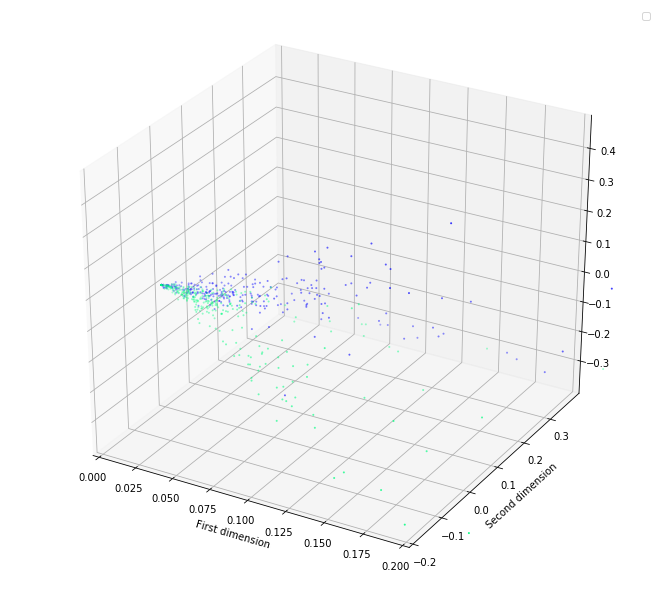

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,8))

ax = Axes3D(fig)
ax.scatter(svd_tfidf[:,0],
          svd_tfidf[:,1],
          svd_tfidf[:,2],
          c = df_combined.target.values,
          cmap = plt.cm.winter_r,
          s = 4,
          edgecolor = 'none',
          marker = 'o')
# plt.title("Semantic Tf-Idf-SVD reduced plot of Sincere-Insincere data distribution")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.legend()
plt.xlim(0.0, 0.20)
plt.ylim(-0.2,0.4)
plt.show()

In [49]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components = 2,
                  verbose = 1,
                  random_state = 1999,
                  n_iter = 10000,
                  learning_rate = 100)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 616 samples in 0.000s...
[t-SNE] Computed neighbors for 616 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 616 / 616
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.571556
[t-SNE] KL divergence after 1850 iterations: 0.449051


In [51]:
tsne_tfidf_df = pd.DataFrame(data=tsne_tfidf, columns=["x", "y"])
tsne_tfidf_df["text"] = df_combined["Text"].values
tsne_tfidf_df["target"] = df_combined['target'].values
tsne_tfidf_df.head()

,x,y,text,target
0,4.524905,28.958405,"[hear, sentiment, often, creative, entrepreneu...",1
1,13.698148,6.197776,"[entrepreneur, nature, tend, people, big, drea...",1
2,4.781595,-7.150470,"[flip, side, often, shy, away, look, upon, dow...",1
3,-2.847954,14.653370,"[set, big, hairy, audacious, goal, company]",1
4,-0.206996,-0.431503,"[goal, critical]",1


In [53]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook, reset_output
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.io import save, output_file

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [55]:
output_notebook()
plot_tfidf = bp.figure(plot_width = 800, plot_height = 700, 
                       title = "T-SNE applied to Tfidf_SVD space",
                       tools = "pan, wheel_zoom, box_zoom, reset, hover, previewsave",
                       x_axis_type = None, y_axis_type = None, min_border = 1)

# colormap = np.array(["#6d8dca", "#d07d3c"])
colormap = np.array(['red', 'blue'])

# palette = d3["Category10"][len(tsne_tfidf_df["asset_name"].unique())]
source = ColumnDataSource(data = dict(x = tsne_tfidf_df["x"], 
                                      y = tsne_tfidf_df["y"],
                                      color = colormap[tsne_tfidf_df["target"] - 1],
                                      author = df_combined['Author'],
                                      text = tsne_tfidf_df["text"],
                                      target = tsne_tfidf_df["target"]))

plot_tfidf.scatter(x = "x", 
                   y = "y", 
                   color="color",
                   legend = "target",
                   source = source,
                   alpha = 0.7)

hover = plot_tfidf.select(dict(type = HoverTool))
hover.tooltips = {"text" : "@text", 
                  "target" : "@target",
                  'authour' : '@author'
                 }

show(plot_tfidf)

Loading BokehJS ...

In [56]:
tsne_model_5 = TSNE(perplexity=5,
                  n_components=2,
                  verbose=1,
                  random_state=1999,
                  n_iter=10000,
                  learning_rate = 100)

tsne_tfidf_5 = tsne_model_5.fit_transform(svd_tfidf)
# Creating a Dataframe for Perplexity=5
tsne_tfidf_df_5 = pd.DataFrame(data=tsne_tfidf_5, columns=["x5", "y5"])
tsne_tfidf_df_5["target"] = df_combined["target"].values


tsne_model_25 = TSNE(perplexity=25,
                  n_components=2,
                  verbose=1,
                  random_state=1999,
                  n_iter=10000,
                  learning_rate = 100)

tsne_tfidf_25 = tsne_model_25.fit_transform(svd_tfidf)
# Creating a Dataframe for Perplexity=25
tsne_tfidf_df_25 = pd.DataFrame(data=tsne_tfidf_25, columns=["x25", "y25"])
tsne_tfidf_df_25["target"] = df_combined["target"].values

tsne_model_50 = TSNE(perplexity=50,
                  n_components=2,
                  verbose=1,
                  random_state=1999,
                  n_iter=10000,
                  learning_rate = 100)

tsne_tfidf_50 = tsne_model_50.fit_transform(svd_tfidf)
# Creating a Dataframe for Perplexity=50
tsne_tfidf_df_50 = pd.DataFrame(data=tsne_tfidf_50, columns=["x50", "y50"])
tsne_tfidf_df_50["target"] = df_combined["target"].values


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 616 samples in 0.001s...
[t-SNE] Computed neighbors for 616 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 616 / 616
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.578857
[t-SNE] KL divergence after 10000 iterations: 0.507833
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 616 samples in 0.001s...
[t-SNE] Computed neighbors for 616 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 616 / 616
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.311768
[t-SNE] KL divergence after 1850 iterations: 0.474468
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 616 samples in 0.001s...
[t-SNE] Computed neighbors for 616 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 616 / 616
[t-SNE] Mean sigma: 0.007169
[t-SNE] KL divergence after 250 iterat

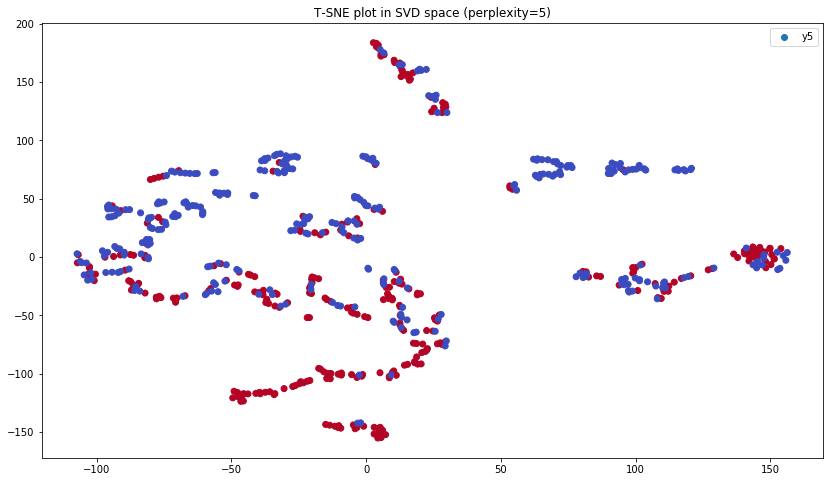

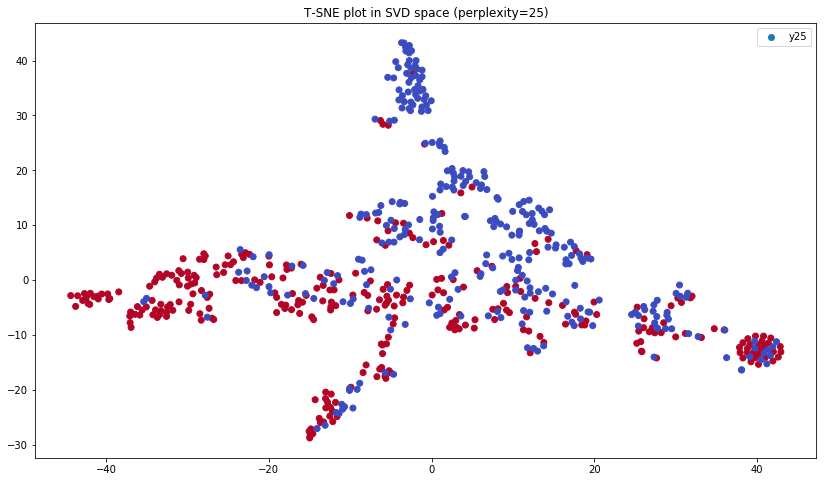

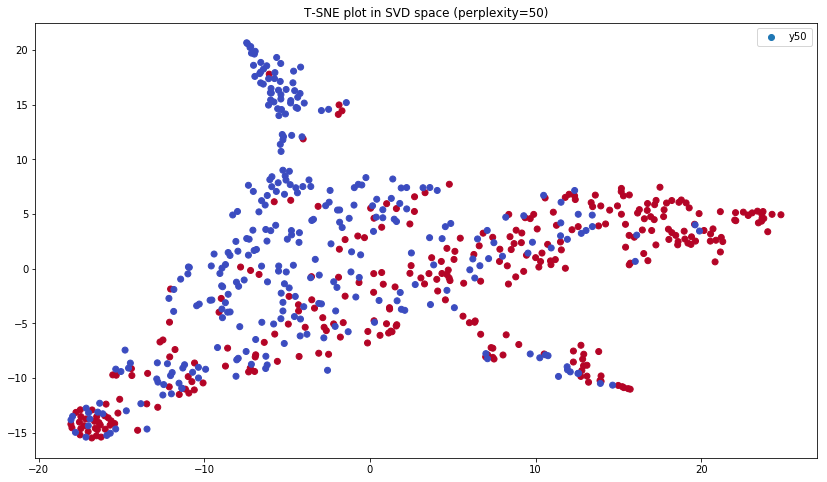

In [57]:
plt.figure(figsize=(14,8))
plt.scatter(tsne_tfidf_df_5.x5, 
            tsne_tfidf_df_5.y5, 
            alpha=1,
            c=tsne_tfidf_df_5.target,
            cmap=plt.cm.coolwarm)
plt.title("T-SNE plot in SVD space (perplexity=5)")
plt.legend()
plt.show()

plt.figure(figsize=(14,8))
plt.scatter(tsne_tfidf_df_25.x25, 
            tsne_tfidf_df_25.y25, 
            alpha=1,
            c=tsne_tfidf_df_25.target,
            cmap=plt.cm.coolwarm)
plt.title("T-SNE plot in SVD space (perplexity=25)")
plt.legend()
plt.show()

plt.figure(figsize=(14,8))
plt.scatter(tsne_tfidf_df_50.x50, 
            tsne_tfidf_df_50.y50, 
            alpha=1,
            c=tsne_tfidf_df_50.target,
            cmap=plt.cm.coolwarm)
plt.title("T-SNE plot in SVD space (perplexity=50)")
plt.legend()
plt.show()

In [59]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

text_list = list(df_combined['Text'])
documents = [TaggedDocument(doc, tags = [str(i)]) for i, doc in enumerate(text_list)]

print ("First text List\n", text_list[0])
print ("\nTagged Document corresponding to the same\n", documents[0])

First text List
 ['hear', 'sentiment', 'often', 'creative', 'entrepreneur', 'small', 'business', 'founder']

Tagged Document corresponding to the same
 TaggedDocument(['hear', 'sentiment', 'often', 'creative', 'entrepreneur', 'small', 'business', 'founder'], ['0'])


In [60]:
# max_epochs = 100
alpha = 0.025
model = Doc2Vec(documents,
               size = 10,
               min_alpha = 0.00025,
               alpha = alpha,
               min_count = 1,
               workers = 4)

tsne_model = TSNE(n_components=2,
                  verbose=1,
                  random_state=1999,
                  n_iter=10000,
                  learning_rate = 100,
                  perplexity = 50
                 )
tsne_d2v = tsne_model.fit_transform(model.docvecs.vectors_docs)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 616 samples in 0.001s...
[t-SNE] Computed neighbors for 616 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 616 / 616
[t-SNE] Mean sigma: 0.040528
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.810463
[t-SNE] KL divergence after 1750 iterations: 1.555097


In [61]:
tsne_d2v_df = pd.DataFrame(tsne_d2v, columns = ['x', 'y'])
tsne_d2v_df['text'] = df_combined['Text']
tsne_d2v_df['target'] = df_combined['target']
tsne_d2v_df = tsne_d2v_df.dropna()
tsne_d2v_df.head()

,x,y,text,target
0,2.696136,5.001455,"[hear, sentiment, often, creative, entrepreneu...",1
1,-2.314730,6.178361,"[entrepreneur, nature, tend, people, big, drea...",1
2,-0.104270,-15.808428,"[flip, side, often, shy, away, look, upon, dow...",1
3,-1.632512,4.393718,"[set, big, hairy, audacious, goal, company]",1
4,14.693456,2.728301,"[goal, critical]",1


In [62]:
output_notebook()
plot_d2v = bp.figure(plot_width = 800, plot_height = 700, 
                       title = "T-SNE applied to Doc2vec document embeddings",
                       tools = "pan, wheel_zoom, box_zoom, reset, hover, previewsave",
                       x_axis_type = None, y_axis_type = None, min_border = 1)

# colormap = np.array(["#6d8dca", "#d07d3c"])
colormap = np.array(["orange", "red"])

# palette = d3["Category10"][len(tsne_tfidf_df["asset_name"].unique())]
source = ColumnDataSource(data = dict(x = tsne_d2v_df["x"], 
                                      y = tsne_d2v_df["y"],
                                      color = colormap[tsne_d2v_df["target"].astype(int) - 1],
                                      author = df_combined['Author'],
                                      sentence = tsne_d2v_df["text"],
                                      target = tsne_d2v_df["target"]))

plot_d2v.scatter(x = "x", 
                   y = "y", 
                   color="color",
                   legend = "target",
                   source = source,
                   alpha = 0.7)
hover = plot_d2v.select(dict(type = HoverTool))
hover.tooltips = {"sentence": "@sentence", 
                  "target":"@target",
                  'author' : '@author'
                 }

show(plot_d2v)

Loading BokehJS ...